## 작업형3

## 문제1

### 문제1-1
주어진 데이터에서 로지스틱 회귀 분석을 수행해 유의확률(p-value)이 0.05 이상인 유의하지 않은 독립변수의 개수를 구하시오. (종속변수: Churn)

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_3/churn.csv")

In [2]:
#1) 로지스틱 회귀 분석을 위한 포뮬라 생성
formula = "Churn ~ AccountWeeks + ContractRenewal + DataPlan + DataUsage + CustServCalls + DayMins + DayCalls + MonthlyCharge +  OverageFee + RoamMins"


#2) 로지스틱 회귀 모델 생성 및 학습
from statsmodels.formula.api import logit
model = logit(formula, data=df).fit()


#3) 유의하지 않은 독립변수의 개수 구하기   # 인터셉트 즉 상수항이 포함되고, True인경우 포함될 수 있는데,intercept는 포함되면 안됨 intercept= y절편
print(model.summary())
print((model.pvalues[1:] > 0.05).sum())

Optimization terminated successfully.
         Current function value: 0.393603
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                 0.02367
Time:                        11:13:10   Log-Likelihood:                -393.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                   0.03924
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2146      0.913     -2.425      0.015      -4.005      -0.424
AccountWeeks  

### 문제1-2
유의확률(p-value)이 0.05 미만인 유의한 변수만을 사용해 다시 로지스틱 회귀 분석을 수행하시오. 이 회귀식의 유의한 회귀 계수(상수항 포함)의 합계를 구하시오. (반올림하여 소수 셋째 자리까지 계산)

###로지스틱 회귀는 종속변수가 0과 1 이어야함!!!
###만약 object형식이면 종속변수 칼럼만 라벨인코딩 해서 넣으면 됨
###나중에 분석할때 만약에 뭐뭐 한 기사가 있다는 0 아니다는 1로 넣고 할때 로지스틱회귀로 쓰면 좋을듯


In [3]:
#1) 유의한 변수 선택
model.pvalues[1:] < 0.05
formula = "Churn ~ DataUsage + DayMins"

#2) 로지스틱 회귀
model = logit(formula, data=df).fit()

#3) 유의한 회귀 계수 합계 #상수항 포함이라고 하면 intercept도 포함해야함!
print(model.summary())

# 유의한 회귀 계수는 p값이 0.05보다 작아야하니 확인 하고 ! / 그다음 회귀계수는 coef라서 coef값을 더하면 됨.
round(sum(model.params),3)

#정답 : -1.213



Optimization terminated successfully.
         Current function value: 0.397599
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      997
Method:                           MLE   Df Model:                            2
Date:                Wed, 18 Jun 2025   Pseudo R-squ.:                 0.01375
Time:                        11:13:13   Log-Likelihood:                -397.60
converged:                       True   LL-Null:                       -403.14
Covariance Type:            nonrobust   LLR p-value:                  0.003908
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0395      0.303     -3.434      0.001      -1.633      -0.446
DataUsage     -0.1697      0.

-1.213

### 문제1-3
문제 1-2에서 수행한 로지스틱 회귀식에서 ‘DataUsage’ 변수가 5만큼 증가할 때 오즈비(Odds Ratio)를
구하시오. (반올림하여 소수 셋째 자리까지 계산)

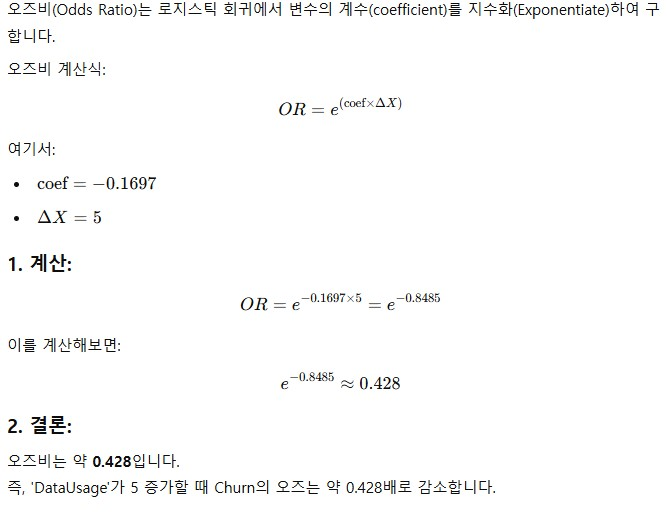

In [ ]:
# 밑에 말고 이렇게 풀면 됨
import numpy as np
result2 = np.exp(model.params['DataUsage']*5)
print(round(result2,3))

#정답:0.428

In [ ]:
#1번 방법 그냥 수학적 계산
import math
coef =  -0.1697
delta_x = 5
odds_ratio = math.exp(coef * delta_x)
print(f"Odds Ratio: {round(odds_ratio, 3)}")

Odds Ratio: 0.428


In [ ]:
#2)번 쨰 방법  summary 까지 다 한상태에서 진행
import numpy as np

#DataUsage 계수 추출 = DataUsage의 coef만 추출하는 방법
coef_datausage = model.params["DataUsage"]
#오즈비 계산
delta_x = 5
odd_ratio = np.exp(coef_datausage * delta_x)

#결과출력
print(f"Odds Ratio: {round(odds_ratio, 3)}")

Odds Ratio: 0.428


## 문제2

### 문제2-1
주어진 데이터를 이용해 종속변수(PIQ)와 독립변수(Brain, Height, Weight)로 다중 선형 회귀 분석을 수행
하시오. 이때 유의확률(p-value)이 가장 작은 변수의 회귀 계수 값을 구하시오. (반올림하여 소수 셋째 자리까지 계산)

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/lovedlim/inf/refs/heads/main/p4/8_3/piq.csv")
df.head()

,PIQ,Brain,Height,Weight
0,132,85.78,62.5,127
1,96,86.54,68.0,135
2,84,90.49,66.3,134
3,134,79.06,62.0,122
4,86,88.91,70.0,180


#### ols  = 최소제곱법 (Ordinary Least Squares의 약자)
#### OLS는 선형 회귀에서 가장 기본적이면서 강력한 도구입니다.
####   coef : 각 독립변수의 회귀계수
####p-value: 유의성 검정 (0.05보다 작으면 유의미)
####R-squared: 결정계수 (모델 설명력, 높을수록 좋음)

In [ ]:
#1) 다중 선형 회귀 분석
from statsmodels.formula.api import ols
model = ols('PIQ ~ Brain +  Height + Weight', data=df).fit()


#2) 가장 작은 p-value를 가진 변수의 회귀 계수 찾기
print(model.summary())
#2.3431

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     9.024
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           8.25e-05
Time:                        10:13:18   Log-Likelihood:                -217.27
No. Observations:                  50   AIC:                             442.5
Df Residuals:                      46   BIC:                             450.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     74.5114     50.564      1.474      0.1

### 문제 2-2
문제 2-1에 적합한 모델의 결정 계수(R-squared) 값을 구하시오. (반올림하여 소수 둘째 자리까지 계산)

In [ ]:
#0.370
#1) 결정계수(R-squared) 값
print(round(model.rsquared,3))

0.37


### 문제 2-3
뇌 크기(Brain)가 90, 키(Height)가 70, 몸무게(Weight)가 150일 때의 PIQ를 예측하시오. (반올림하여 정수로 계산)

In [ ]:
#소문제들은 연결이 되어있어서 앞에서 만든 걸 바탕으로 예측하면됨

#1) 새로운 데이터 생성
new_data = pd.DataFrame({'Brain': [90],
              'Height': [70],
              'Weight' : [150]
              })


#2) PIQ 예측
pred = model.predict(new_data)
print(round(pred[0]))

106
